In [176]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *

from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score

## This function will plot the true vs. predicted with various line fits
def plotSummary(true, predicted, name):
    #from pylab import *
    #import numpy as np
    #import matplotlib.pyplot as plt
    
    figure()
    plt.scatter(true,predicted, alpha = 0.2)
    axes().set_title(name)
    axes().set_xlabel('True')
    axes().set_ylabel('Predicted')

    xmin, xmax = plt.xlim()
    plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

    fit_temp = np.polyfit(true, predicted,1)
    xp = np.linspace(xmin, xmax, 100)
    p = np.poly1d(fit_temp)
    plt.plot(xp, p(xp), '-', color = 'black')
    
    print(' ')
    print('RMSE on test data:', np.sqrt(mean_squared_error(true, predicted)), 'for ', name)


    
    return


In [147]:
#Load the training data
col_names = ['deltaI', 'deltaR', 'avgPeak', 'avgWidth', 'avgProm']
peak_names = ['peak1', 'peak2', 'peak3', 'peak4', 'peak5']
locs_names = ['loc1', 'loc2', 'loc3', 'loc4', 'loc5']
width_names = ['width1', 'width2', 'width3','width4', 'width5']
prom_names = ['prom1', 'prom2', 'prom3', 'prom4', 'prom5']
col_names = col_names + peak_names + locs_names + width_names + prom_names

data = pd.read_csv('LineCutTrainingData051418.csv', header = None, names = col_names)

#The peak information columns have zeros when there weren't 5 peaks

data.head()

,deltaI,deltaR,avgPeak,avgWidth,avgProm,peak1,peak2,peak3,peak4,peak5,...,width1,width2,width3,width4,width5,prom1,prom2,prom3,prom4,prom5
0,0.81472,-0.147980,5.2376,0.017787,4.9919,8.8011,6.3141,5.0277,4.2308,3.7147,...,0.004366,0.008760,0.014187,0.020411,0.026567,8.5696,6.1381,4.8111,3.9784,3.4302
1,0.12699,-0.136070,2.6964,0.028479,2.0502,4.8072,3.3659,2.6933,2.3064,2.0581,...,0.006400,0.015034,0.024527,0.034571,0.044302,4.0741,3.0305,2.2895,1.8457,1.5491
2,0.63236,-1.417600,9.4789,0.010580,9.3400,17.1920,11.3730,9.0202,7.2687,6.3684,...,0.002534,0.005047,0.008062,0.012225,0.015909,17.0760,11.2750,8.8971,7.1230,6.2019
3,0.27850,-0.711760,10.2640,0.008488,10.1540,11.4840,13.2930,11.6750,9.5615,8.1874,...,0.003443,0.004523,0.006383,0.009193,0.012372,11.3760,13.2180,11.5810,9.4507,8.0602
4,0.95751,-0.055153,5.4478,0.017317,5.2103,9.5000,6.4023,5.1749,4.3685,3.8117,...,0.003987,0.008688,0.013858,0.019786,0.025924,9.2822,6.2320,4.9647,4.1231,3.5350


## Creating the training and testing sets

In [148]:
#Assigning the different columns to new dataframe names

#Target variables
Y1 = pd.DataFrame(data['deltaI']) #just delta I
Y2 = pd.DataFrame(data['deltaR']) # just delta R
Y3 = pd.DataFrame.join(Y1, Y2) # both deltas

#Indicator variables
X1 = data[col_names[2:]] #all variables
X2 = data[col_names[5:]] #not the average variables
X3 = data[col_names[2:5]] #just the average variables

#Splitting into train and test sets

#Random state
rs = 42
#Test size
ts1 = 0.3

X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X1, Y1, test_size = ts1, random_state = rs)
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X2, Y2, test_size = ts1, random_state = rs)
X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X3, Y3, test_size = ts1, random_state = rs)


## Linear Regression models

#### Using linear regression from scikit-learn with all variables 


Coefficients: 
               deltaI      deltaR
avgPeak    -0.070195    0.397363
avgWidth  124.071622  129.584566
avgProm     0.024801   -0.432314
peak1      -0.871793    0.503299
peak2      -4.364336   35.148653
peak3      23.599074  -64.327024
peak4      -4.900366   -5.069427
peak5     -21.891172    7.777064
loc1       41.115400  -74.790760
loc2       -2.138044  -59.987918
loc3        7.067450   19.303539
loc4        1.222247    3.232055
loc5       -1.726299   -4.577951
width1   -177.742203  237.395460
width2    -85.591629  145.263462
width3    -26.747357  -75.134850
width4     46.388105  137.039658
width5     69.562889   83.656211
prom1       0.865802   -0.495665
prom2       4.367755  -35.138877
prom3     -23.603863   64.323537
prom4       4.903153    5.082092
prom5      21.892536   -7.766884
Mean squared error: 0.029
Variance score: 0.766
Score on test set: 0.786
 
RMSE on test data: 0.148849399865 for  Delta I
 
RMSE on test data: 0.191875702641 for  Delta R


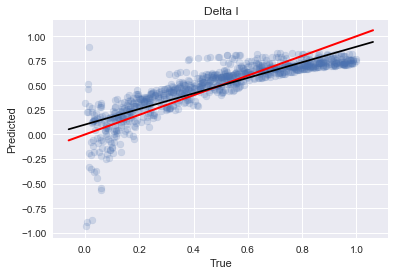

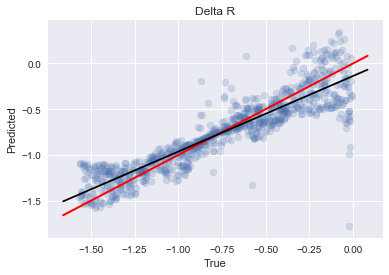

In [149]:
#Initialize and fit model to training data
reg = linear_model.LinearRegression()
reg1 = reg.fit(X_1_train, Y_3_train)

#Make predictions using the testing set
y_pred1 = reg1.predict(X_1_test)

# The coefficients
print('Coefficients: \n', pd.DataFrame(reg1.coef_.T, index = X1.columns , columns = Y3.columns))
# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(Y_3_test, y_pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(Y_3_test, y_pred1))

print('Score on test set: %.3f' % reg1.score(X_1_test, Y_3_test))

# Plot outputs
plotSummary(Y_3_test['deltaI'], y_pred1[:,0], 'Delta I')
plotSummary(Y_3_test['deltaR'], y_pred1[:,1], 'Delta R')

#### Using linear regression from scikit-learn with non-average variables

Coefficients: 
             deltaI      deltaR
peak1    -0.741901    0.892310
peak2   -10.187392   50.635685
peak3    29.695740  -89.645666
peak4   -12.936964  -18.759167
peak5   -12.470571   30.787125
loc1     62.765582  -72.026334
loc2      1.805427  -65.635055
loc3      4.433252   26.651986
loc4      3.727135    0.194762
loc5     -3.170542   -4.828524
width1 -161.130862  246.958618
width2  -69.832641  186.506751
width3  -41.858887  -70.690421
width4   65.783503  199.864392
width5  102.061265   95.750462
prom1     0.727406   -0.889849
prom2    10.186138  -50.630958
prom3   -29.710006   89.640278
prom4    12.933811   18.768291
prom5    12.468669  -30.782600
Mean squared error: 0.039
Variance score: 0.685
Score on test set: 0.719
 
RMSE on test data: 0.175881452231 for  Delta I
 
RMSE on test data: 0.215404866455 for  Delta R


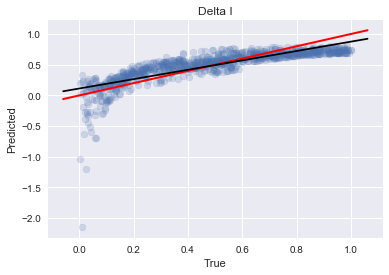

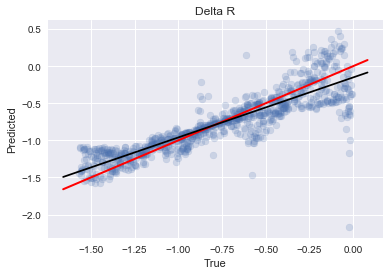

In [150]:
#Initialize and fit model to training data
reg2 = linear_model.LinearRegression()
reg2.fit(X_2_train, Y_3_train)

#Make predictions using the testing set
y_pred2 = reg2.predict(X_2_test)

# The coefficients
print('Coefficients: \n', pd.DataFrame(reg2.coef_.T, index = X2.columns , columns = Y3.columns))
# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(Y_3_test, y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(Y_3_test, y_pred2))

print('Score on test set: %.3f' % reg2.score(X_2_test, Y_3_test))

# Plot outputs
plotSummary(Y_3_test['deltaI'], y_pred2[:,0],'Delta I')
plotSummary(Y_3_test['deltaR'], y_pred2[:,1], 'Delta R')

In [137]:
y_pred2 = reg2.predict(X_2_test)
print(r2_score(Y_3_test, y_pred2))
print(reg2.score(X_2_test, Y_3_test))

#It is odd that these numbers are different. -- I'm pretty sure they should be the same. 


0.685343428305
0.718808415994


#### Using linear regression from scikit-learn with only average variables

Coefficients: 
              deltaI     deltaR
avgPeak   -0.559148   0.623904
avgWidth -14.967260  40.019931
avgProm    0.497997  -0.631714
Mean squared error: 0.067
Variance score: 0.502
Score on test set: 0.512
 
RMSE on test data: 0.202426160062 for  Delta I
 
RMSE on test data: 0.305530043003 for  Delta R


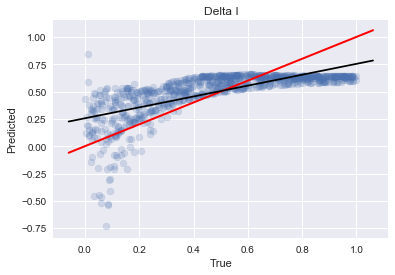

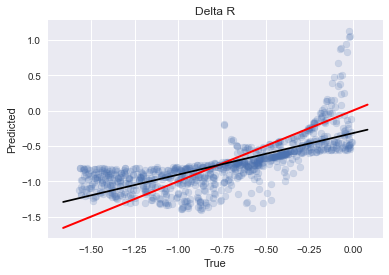

In [151]:
#Initialize and fit model to training data
reg3 = linear_model.LinearRegression()
reg3.fit(X_3_train, Y_3_train)

#Make predictions using the testing set
y_pred3 = reg3.predict(X_3_test)

# The coefficients
print('Coefficients: \n', pd.DataFrame(reg3.coef_.T, index = X3.columns , columns = Y3.columns))
# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(Y_3_test, y_pred3))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(Y_3_test, y_pred3))

print('Score on test set: %.3f' % reg3.score(X_3_test, Y_3_test))

# Plot outputs
plotSummary(Y_3_test['deltaI'], y_pred3[:,0],'Delta I')
plotSummary(Y_3_test['deltaR'], y_pred3[:,1], 'Delta R')


#### Using statsmodels on (X1, Y1)

                            OLS Regression Results                            
Dep. Variable:                 deltaI   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1274.
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        11:11:20   Log-Likelihood:                 1015.2
No. Observations:                2100   AIC:                            -1984.
Df Residuals:                    2077   BIC:                            -1854.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avgPeak       -0.1265      0.024     -5.208      0.0

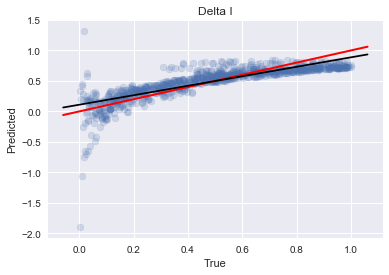

In [153]:
#Initialize and fit OLS model for deltaI 
model1 = sm.OLS(Y_1_train, X_1_train)
results1 = model1.fit()

#Make predictions on testing data
predictions1 = results1.predict(X_1_test) # make the predictions by the model

print(results1.summary())

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_1_test['deltaI'], predictions1,'Delta I')


#### Using statsmodels on (X1, Y2)

                            OLS Regression Results                            
Dep. Variable:                 deltaR   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1598.
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        11:11:54   Log-Likelihood:                 313.80
No. Observations:                2100   AIC:                            -581.6
Df Residuals:                    2077   BIC:                            -451.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avgPeak        0.5382      0.034     15.862      0.0

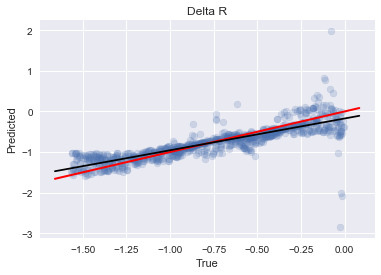

In [154]:
#Initialize and fit OLS model for deltaR 
model1a = sm.OLS(Y_2_train, X_1_train)
results1a = model1a.fit()

#Make predictions on testing data
predictions1a = results1a.predict(X_1_test) # make the predictions by the model

print(results1a.summary())

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_2_test['deltaR'], predictions1a,'Delta R')
print(' ')#spacing out the text
print('Sum of absolute residuals:', results1a.resid.abs().sum())
print('Sum of squared residuals:' , results1a.ssr)
print('R Squared, on training data:', results1a.rsquared)

print('RMSE on test data:', np.sqrt(mean_squared_error(Y_2_test, predictions1a)))
print('RMSE on training data:', np.sqrt(mean_squared_error(Y_2_train, results1a.predict(X_1_train))))

#### Using statsmodels on (X2, Y1)

                            OLS Regression Results                            
Dep. Variable:                 deltaI   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1110.
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        11:12:21   Log-Likelihood:                 744.93
No. Observations:                2100   AIC:                            -1450.
Df Residuals:                    2080   BIC:                            -1337.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
peak1         -1.5869      0.140    -11.328      0.0

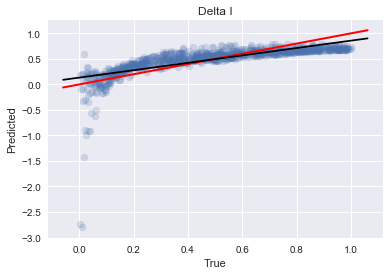

In [155]:
#Initialize and fit OLS model for deltaI 
model2 = sm.OLS(Y_1_train, X_2_train)
results2 = model2.fit()

#Make predictions on testing data
predictions2 = results2.predict(X_2_test) # make the predictions by the model

print(results2.summary())

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_1_test['deltaI'], predictions2,'Delta I')


#### Using statsmodels with (X2,Y2)

                            OLS Regression Results                            
Dep. Variable:                 deltaR   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1612.
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        11:12:28   Log-Likelihood:                 182.14
No. Observations:                2100   AIC:                            -324.3
Df Residuals:                    2080   BIC:                            -211.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
peak1          2.2805      0.183     12.452      0.0

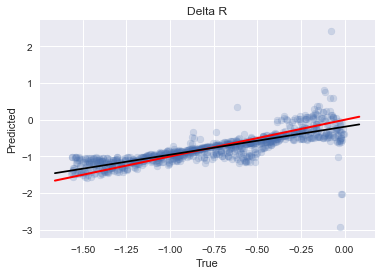

In [156]:
#Initialize and fit OLS model for deltaR 
model2a = sm.OLS(Y_2_train, X_2_train)
results2a = model2a.fit()

#Make predictions on testing data
predictions2a = results2a.predict(X_2_test) # make the predictions by the model

print(results2a.summary())

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_2_test['deltaR'], predictions2a,'Delta R')


#### Using statsmodels on (X3, Y1)

                            OLS Regression Results                            
Dep. Variable:                 deltaI   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     2377.
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        11:15:13   Log-Likelihood:                -279.66
No. Observations:                2100   AIC:                             565.3
Df Residuals:                    2097   BIC:                             582.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avgPeak       -0.5114      0.031    -16.285      0.0

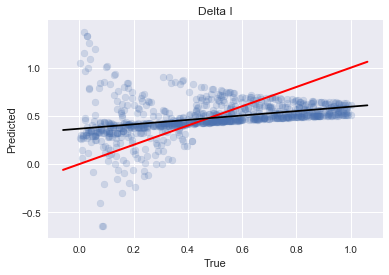

In [161]:
#Initialize and fit OLS model for deltaI 
model3 = sm.OLS(Y_1_train, X_3_train)
results3 = model3.fit()

#Make predictions on testing data
predictions3 = results3.predict(X_3_test) # make the predictions by the model

print(results3.summary())

#If we plot the predictions against the test data, a perfect model should be linear
plotSummary(Y_1_test['deltaI'], predictions3,'Delta I')


#### Using statsmodels on (X3, Y2)

                            OLS Regression Results                            
Dep. Variable:                 deltaR   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     3848.
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        11:15:59   Log-Likelihood:                -794.85
No. Observations:                2100   AIC:                             1596.
Df Residuals:                    2097   BIC:                             1613.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avgPeak        0.5761      0.040     14.355      0.0

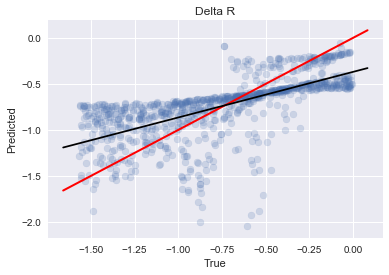

In [162]:
#Initialize and fit OLS model for deltaR 
model3a = sm.OLS(Y_2_train, X_3_train)
results3a = model3a.fit()

#Make predictions on testing data
predictions3a = results3a.predict(X_3_test) # make the predictions by the model

print(results3a.summary())

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_2_test['deltaR'], predictions3a,'Delta R')


#### Statsmodels GLM (generalized linear models) with (X1, Y1)

               Results: Generalized linear model
Model:              GLM              AIC:            -1984.3579 
Link Function:      identity         BIC:            -15841.6539
Dependent Variable: deltaI           Log-Likelihood: 1015.2     
Date:               2018-05-17 11:16 LL-Null:        -385.78    
No. Observations:   2100             Deviance:       46.758     
Df Model:           22               Pearson chi2:   46.8       
Df Residuals:       2077             Scale:          0.022512   
Method:             IRLS                                        
----------------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
----------------------------------------------------------------
avgPeak     -0.1265   0.0243  -5.2080 0.0000   -0.1741   -0.0789
avgWidth   141.4722   7.3449  19.2613 0.0000  127.0765  155.8679
avgProm      0.0772   0.0244   3.1680 0.0015    0.0294    0.1249
peak1       -1.3577   0.1260 -10.7773 0.0

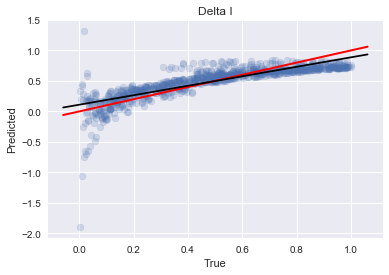

In [163]:
#Initialize and fit GLM model for deltaI 
model4 = sm.GLM(Y_1_train,X_1_train)
results4 = model4.fit()

#Make predictions on testing data
predictions4 = results4.predict(X_1_test)

print(results4.summary2())

#Plot results

plotSummary(Y_1_test['deltaI'], predictions4,'Delta I')


#### Statsmodels GLM with (X1, Y2)

               Results: Generalized linear model
Model:              GLM              AIC:            -581.6024  
Link Function:      identity         BIC:            -15797.2205
Dependent Variable: deltaR           Log-Likelihood: 313.80     
Date:               2018-05-17 11:16 LL-Null:        -1304.3    
No. Observations:   2100             Deviance:       91.191     
Df Model:           22               Pearson chi2:   91.2       
Df Residuals:       2077             Scale:          0.043905   
Method:             IRLS                                        
----------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------
avgPeak        0.5382   0.0339  15.8623 0.0000   0.4717   0.6047
avgWidth      86.0895  10.2573   8.3930 0.0000  65.9855 106.1935
avgProm       -0.5632   0.0340 -16.5575 0.0000  -0.6299  -0.4965
peak1          1.7178   0.1759   9.7643 0

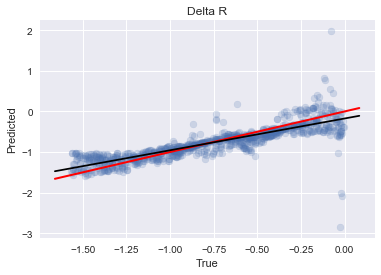

In [164]:
#Initialize and fit GLM model for deltaR
model4a = sm.GLM(Y_2_train,X_1_train)
results4a = model4a.fit()

#Make predictions on testing data
predictions4a = results4a.predict(X_1_test)

print(results4a.summary2())

#Plot results

plotSummary(Y_2_test['deltaR'], predictions4a,'Delta R')


#### Statsmodels GLM with (X2, Y1)

               Results: Generalized linear model
Model:              GLM              AIC:            -1449.8569 
Link Function:      identity         BIC:            -15850.8778
Dependent Variable: deltaI           Log-Likelihood: 744.93     
Date:               2018-05-17 11:16 LL-Null:        -385.78    
No. Observations:   2100             Deviance:       60.483     
Df Model:           19               Pearson chi2:   60.5       
Df Residuals:       2080             Scale:          0.029078   
Method:             IRLS                                        
----------------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
----------------------------------------------------------------
peak1       -1.5869   0.1401 -11.3280 0.0000   -1.8615   -1.3123
peak2       -9.3792   3.4323  -2.7327 0.0063  -16.1064   -2.6521
peak3       30.8240   6.8004   4.5327 0.0000   17.4955   44.1526
peak4       -8.1777   6.7804  -1.2061 0.2

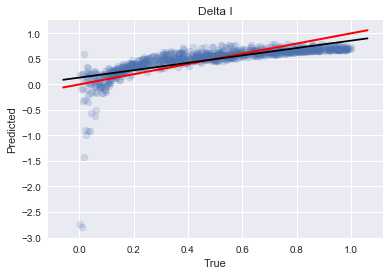

In [165]:
#Initialize and fit GLM model for deltaI
model5 = sm.GLM(Y_1_train,X_2_train)
results5 = model5.fit()

#Make predictions on testing data
predictions5 = results5.predict(X_2_test)

print(results5.summary2())

#Plot results
plotSummary(Y_1_test['deltaI'], predictions5,'Delta I')




#### Statsmodels GLM with (X2, Y2)

               Results: Generalized linear model
Model:              GLM              AIC:            -324.2885  
Link Function:      identity         BIC:            -15807.9876
Dependent Variable: deltaR           Log-Likelihood: 182.14     
Date:               2018-05-17 11:16 LL-Null:        -1304.3    
No. Observations:   2100             Deviance:       103.37     
Df Model:           19               Pearson chi2:   103.       
Df Residuals:       2080             Scale:          0.049699   
Method:             IRLS                                        
-----------------------------------------------------------------
         Coef.    Std.Err.     z      P>|z|     [0.025    0.975] 
-----------------------------------------------------------------
peak1     2.2805    0.1831   12.4521  0.0000     1.9216    2.6395
peak2    49.3080    4.4871   10.9887  0.0000    40.5134   58.1027
peak3   -91.4993    8.8904  -10.2919  0.0000  -108.9242  -74.0743
peak4   -26.5778    8.8643   -2.998

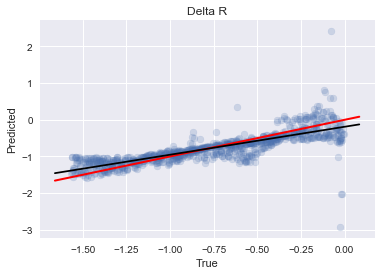

In [166]:
#Initialize and fit GLM model for deltaR
model5a = sm.GLM(Y_2_train,X_2_train)
results5a = model5a.fit()

#Make predictions on testing data
predictions5a = results5a.predict(X_2_test)

print(results5a.summary2())

#Plot results

plotSummary(Y_2_test['deltaR'], predictions5a,'Delta R')



## Decision Tree Models
#### Using Decision Trees in scikit-learn to predict deltaI and deltaR simultaneously

#### Using (X1, Y3)

            Regr 1    Regr 2    Regr 3
avgPeak   0.000953  0.001587  0.005746
avgWidth  0.095685  0.099229  0.095574
avgProm   0.476665  0.476359  0.471697
peak1     0.016073  0.015142  0.014219
peak2     0.001634  0.000784  0.000761
peak3     0.000137  0.001506  0.000321
peak4     0.000995  0.000930  0.002010
peak5     0.042139  0.000802  0.010663
loc1      0.004727  0.004727  0.004776
loc2      0.004031  0.004005  0.004162
loc3      0.003624  0.003637  0.003355
loc4      0.009284  0.009158  0.009295
loc5      0.271814  0.271724  0.271744
width1    0.009299  0.008687  0.009678
width2    0.009061  0.011045  0.011094
width3    0.002179  0.002361  0.002211
width4    0.007132  0.003837  0.003779
width5    0.022946  0.014730  0.015389
prom1     0.008605  0.010413  0.010259
prom2     0.001032  0.000582  0.000506
prom3     0.000197  0.000334  0.000355
prom4     0.005610  0.012078  0.005769
prom5     0.006179  0.046344  0.046637
 
RMSE on test data: 0.0264738053492 for  deltaI Depth 10
 
RMSE

array([ 0.99582722,  0.99612122,  0.99563589,  0.9925137 ,  0.99364058,
        0.99343833,  0.99585159,  0.99423188,  0.99343314,  0.99572592])

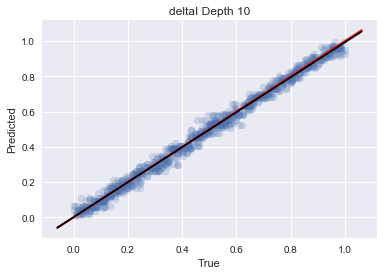

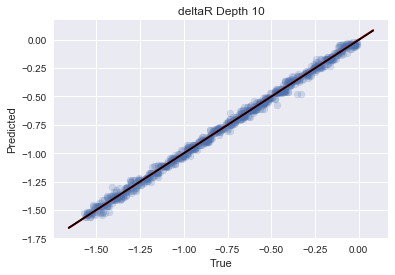

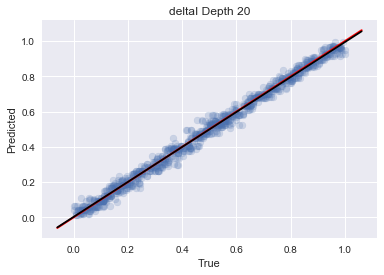

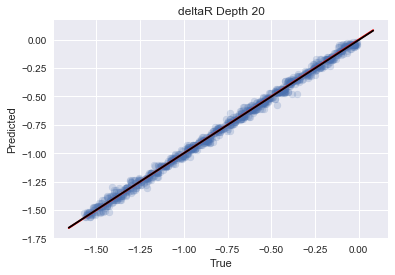

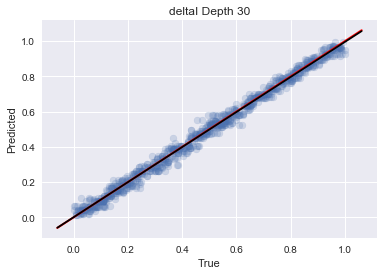

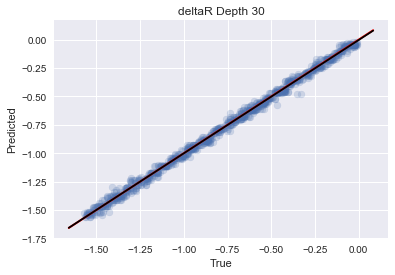

In [204]:
#Initialize the models with various max depths
regr_1 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
regr_2 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
regr_3 = DecisionTreeRegressor(max_depth=30, min_samples_leaf=5)

#Fit the models
regr_1.fit(X_1_train, Y_3_train)
regr_2.fit(X_1_train, Y_3_train)
regr_3.fit(X_1_train, Y_3_train)


#Print the coefficients or importances

data1 = pd.DataFrame(regr_1.feature_importances_.T, columns = ['Regr 1']) 

data1['Regr 2'] = pd.Series(regr_2.feature_importances_.T)
data1['Regr 3'] = pd.Series(regr_3.feature_importances_.T)
data1.index = X_1_train.columns

print(data1)


#Use model to predict
y_1 = regr_1.predict(X_1_test)
y_2 = regr_2.predict(X_1_test)
y_3 = regr_3.predict(X_1_test)

#Plot results
s = 25
plotSummary(Y_3_test['deltaI'], y_1[:,0], 'deltaI Depth 10')
plotSummary(Y_3_test['deltaR'], y_1[:,1], 'deltaR Depth 10')

plotSummary(Y_3_test['deltaI'], y_2[:,0], 'deltaI Depth 20')
plotSummary(Y_3_test['deltaR'], y_2[:,1], 'deltaR Depth 20')

plotSummary(Y_3_test['deltaI'], y_3[:,0], 'deltaI Depth 30')
plotSummary(Y_3_test['deltaR'], y_3[:,1], 'deltaR Depth 30')
print(' ')

#Trying to understand the scoring
print('Regression 1 Score: ', regr_1.score(X_1_test,Y_3_test), ', using max depth of 10')
print('Regression 2 Score: ', regr_2.score(X_1_test,Y_3_test), ', using max depth of 20')
print('Regression 3 Score: ', regr_3.score(X_1_test,Y_3_test),', using max depth of 30')



regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
cross_val_score(regressor, X1, Y3, cv=10)